<a href="https://colab.research.google.com/github/prab-tri/demo/blob/master/ICP05_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is ICP05 for python lession.**

**Created by - Prabhanjan Trivedi**

In [151]:
#importing all required libraries 
import pandas as pd
import numpy as np
#visualization
import seaborn as sns
import matplotlib.pyplot as plt
#ML libraries
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

**Question 1** - 1.Delete all the outlier data for the GarageArea field (for the same data set in the use case: House Prices).
For this task you need to plot GaurageArea field and SalePrice in scatter plot, then check which numbers are anomalies. 

In [2]:
#uploading the file from local drive 
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
#reading the file in dataframe 
train_df = pd.read_csv('train.csv')

In [5]:
#view of statistical anlaysis over numerical features in data
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#Statistical data for column SalePrice 
train_df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [12]:
#skewness of SalePrice in data - the measure of asymmetry 
print ("Skew is:", train_df.SalePrice.skew())

Skew is: 1.8828757597682129


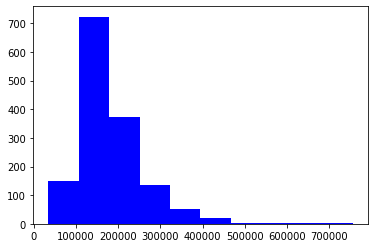

In [13]:
plt.hist(train_df.SalePrice, color='blue')
plt.show()

Above graph shows that there is positive skewness for SalePrice column in data.

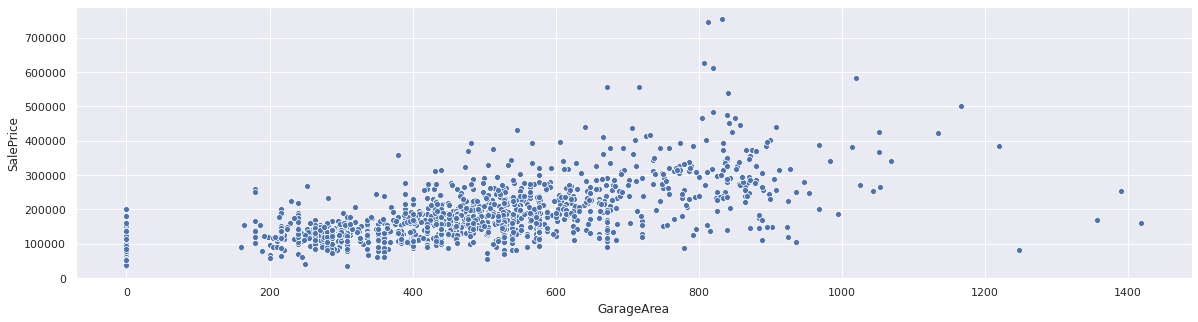

In [68]:
#scatterplot between columns GarageArea and SalePrice  
#Setting plot size
plt.figure(figsize=(20,5))
#scatterplot using seaborn libary
sns.scatterplot(data = train_df, x="GarageArea", y="SalePrice")
#setting grid to plot
sns.set(style='darkgrid',)
plt.show()

I used grid style so that we can determine the outliner to filter the data.

Based on above data, We can consider only those rows having SalePrice less 350000 and GarageArea in between 100 and 1200.

In [80]:
filter_df = train_df[(train_df['GarageArea'] > 100) & (train_df['SalePrice'] < 350000) & (train_df['GarageArea'] < 1200)  ]

In [83]:
filter_df[(filter_df['SalePrice']) > 350000 ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


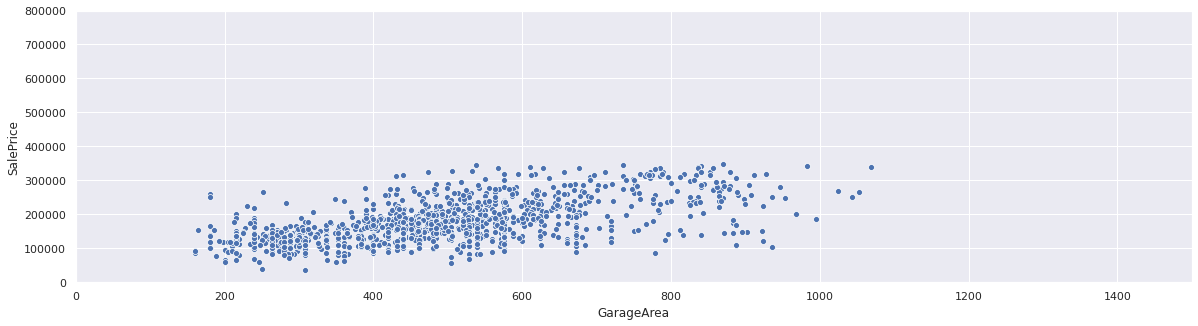

In [82]:
#scatterplot between columns GarageArea and SalePrice on filtered data
#Setting plot size
plt.figure(figsize=(20,5))
#scatterplot using seaborn libary
sns.scatterplot(data = filter_df, x="GarageArea", y="SalePrice")
sns.set(style='darkgrid',)
# control x and y limits for plot
plt.ylim(0, 800000)
plt.xlim(0, 1500)
plt.show()

**Question 2  -** Create Multiple Regression for the “wine quality” dataset. In this data set “quality” is the target label.
Evaluate the model using RMSE and R2 score.

** You need to delete the null values in the data set

** You need to find the top 3 most correlated features to the target label(quality)
 

In [90]:
#uploading the file from local drive 
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (1).csv


In [91]:
#reading the file in dataframe 
wine_data = pd.read_csv('winequality-red.csv')

In [93]:
#This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can see above that there is total 1599 rows and not a single column has null values.

In [103]:
#Removing na values from data if any
data1 = wine_data.select_dtypes(include=[np.number]).interpolate().dropna()

In [104]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [106]:
#Working with Numeric Features and getting top and bottom 3 most correlated feature in data with 'quality' column.
numeric_features = data1.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['quality'].sort_values(ascending=False)[:4], '\n')
print (corr['quality'].sort_values(ascending=False)[-4:])
quality_pivot = data1.pivot_table(index='alcohol',
                                  values='quality', aggfunc=np.median)
print(quality_pivot)

quality        1.000000
alcohol        0.476166
sulphates      0.251397
citric acid    0.226373
Name: quality, dtype: float64 

chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64
           quality
alcohol           
8.400000       4.5
8.500000       5.0
8.700000       6.0
8.800000       5.0
9.000000       6.0
...            ...
13.500000      6.0
13.566667      7.0
13.600000      7.0
14.000000      6.0
14.900000      5.0

[65 rows x 1 columns]


From Above data, we can see that columns **'alcohol', 'sulphates' and 'citric acid'** are highly correlated to column 'quality'.

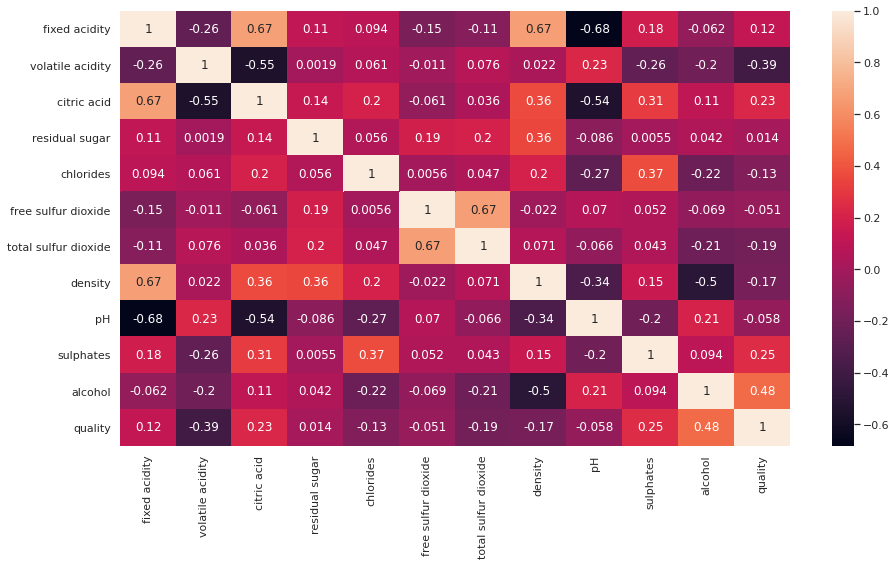

In [154]:
#Plotting correlation matrix on dataframe using pearson method
#It will display correlation between each feature and target value.
#plotted using heatmap
corr = data1.corr(method = 'pearson')
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True)

Above heat map of coorelation also tells same information that **'alcohol', 'sulphates' and 'citric acid'** are highly correlated to column 'quality'.

In [140]:
##Build a multiple linear model
y = data1.quality
X = data1.drop(['quality'], axis=1)
#Taking testing siz of 33% and rest fpr trainig to fit the model
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)
lr = linear_model.LinearRegression()

In [141]:
#Fitting the model
model = lr.fit(X_train, y_train)

In [142]:
##Evaluate the performance and visualize results
print ("R^2 is: \n", model.score(X_test, y_test))
predictions = model.predict(X_test)
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

R^2 is: 
 0.35944431072490646
RMSE is: 
 0.42420408998018394


We got **R^2  = 0.35944 and RMSE = 0.4242.**

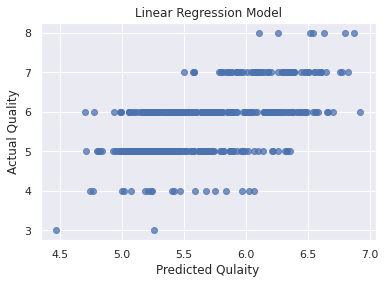

In [144]:
##visualize
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Qulaity')
plt.ylabel('Actual Quality')
plt.title('Linear Regression Model')
plt.show()

Now We are defining the model based on correlation.
So we considering two most positively correlated  and two most negatively correlated features. 

In [145]:
##Build a multiple linear model with only 4 features 
y1 = data1.quality
X1 = data1[['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide']] 
#Taking testing siz of 33% and rest fpr trainig to fit the model
X1_train, X1_test, y1_train, y1_test = train_test_split(
                                    X1, y1, random_state=42, test_size=.33)
lr1 = linear_model.LinearRegression()

In [146]:
#Fitting the model
model1 = lr1.fit(X1_train, y1_train)

In [150]:
##Evaluate the performance and visualize results
print ("R^2 is: \n", model1.score(X1_test, y1_test))
predictions1 = model1.predict(X1_test)
print ('RMSE is: \n', mean_squared_error(y1_test, predictions1))

R^2 is: 
 0.3384487896349331
RMSE is: 
 0.43810824549195704


Here we get a very little improvement.

We have **R^2  = 0.35944 and RMSE = 0.4242.**

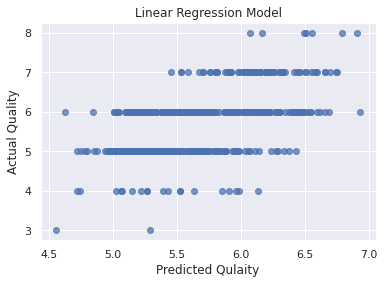

In [149]:
##visualize
actual_values = y1_test
plt.scatter(predictions1, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Qulaity')
plt.ylabel('Actual Quality')
plt.title('Linear Regression Model')
plt.show()